### Gaussian Naive Bayes Classifier on Titanic Dataset

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set()
%matplotlib inline

In [16]:
raw_data = pd.read_csv('./datasets/titanic.csv')
raw_data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


#### Droping extra columms


In [17]:
data = raw_data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')

data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [18]:
# Dealing with missing values
mv = data.isnull().sum()
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

mv

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [19]:
data_with_dummies = pd.get_dummies(data_no_mv, drop_first=True)
# Drop the 'Fare' column
data_no_multicollinearity = data_with_dummies.drop('Fare', axis=1)
data_no_multicollinearity.head()

,Pclass,Age,Survived,Sex_male
0,3,22.0,0,True
1,1,38.0,1,False
2,3,26.0,1,False
3,1,35.0,1,False
4,3,35.0,0,True


/var/folders/lc/zhbbf4956nxf1hwwhzr8760m0000gn/T/ipykernel_32087/4092913090.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_multicollinearity['Age'])


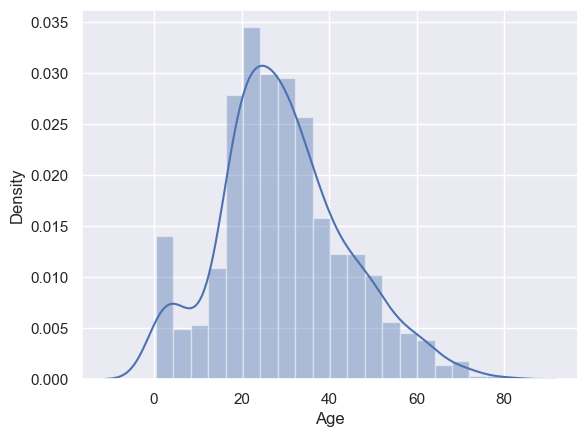

In [20]:
sns.distplot(data_no_multicollinearity['Age'])
plt.show()

#### Model

In [21]:
features = data_no_multicollinearity.drop('Survived', axis=1)
label = data_no_multicollinearity['Survived']

# Split the data into training and test sets, in a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

# Build and fit the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Making predictions
pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
acc

0.7692307692307693

In [22]:
# Create a Confusion Matrix
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,74,12
Actual 1,21,36
